### Generate island elevation using compression
1. Generate combination of perlin noises (experiment with amplitude and frequency)
2. Make noise that sets island boundaries (perlin probably won't work)
3. Compress water region and uplift land outlying from water
4. Develop frame of moisture (from random noise and distance from water)
5. Map moisture and height to biome

If the effect would be pretty good I thinking about 3D presentation.

In [37]:
import __init__
import numpy as np
import math
from engine import Noise,Heatmap,CombineNoises,gradient
from noises import perlin,simplex,heat,heat
from matplotlib import pyplot as plt
import island_moisture as MCode

In [38]:
#seed = 200
seed = np.random.randint(100,10000)
print(seed)

6122


In [39]:
Noise(simplex,
	resolution = (1, 1000),
	octaves = 10,
	persistence = 3.2,
	lacunarity = 0.53,
	seed = (0, 1000),
    cmap="gray_r",
    cbar=True)

# Noise(perlin,
# 	resolution = (1, 1000),
# 	octaves = 8,
# 	persistence = 2.0,
# 	lacunarity = 0.5,
# 	seed = (500, 1000),
#     cmap="gray")

interactive(children=(IntSlider(value=500, description='resolution', max=1000, min=1), IntSlider(value=10, des…

In [40]:
Noise(heat,
	resolution=500,
	temperature = (0, 30),
	x = (0, 300),
	y = (0, 300),
	cbar = True, cmap = 'gray_r')

interactive(children=(IntSlider(value=500, description='resolution', max=1500, min=-500), IntSlider(value=15, …

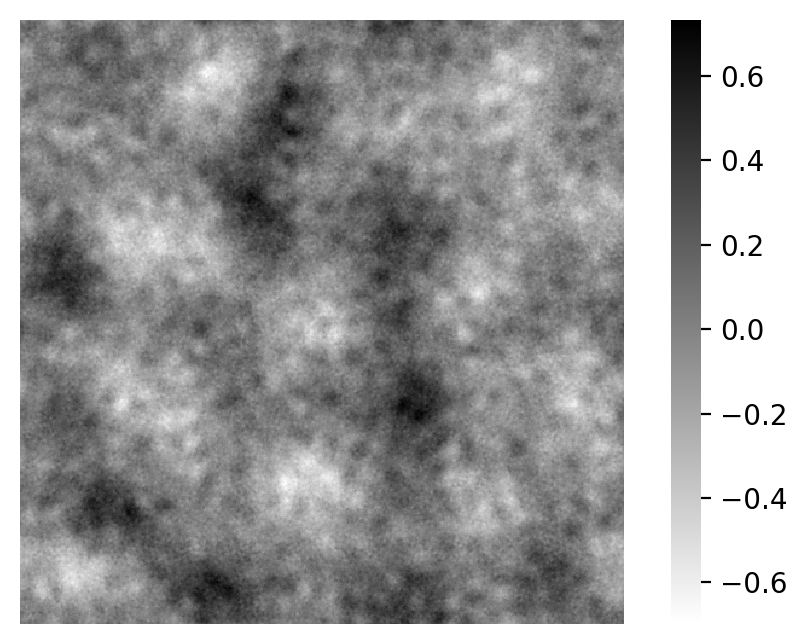

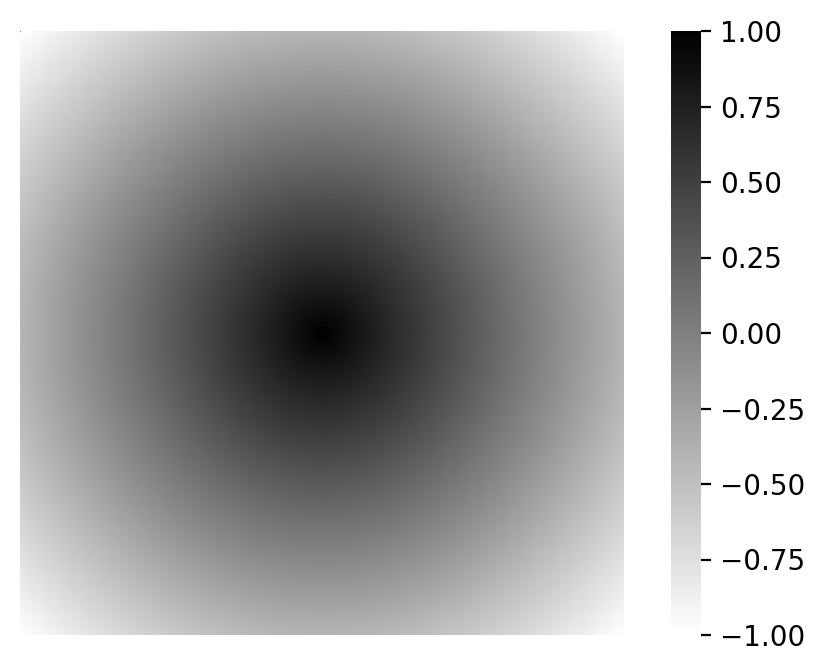

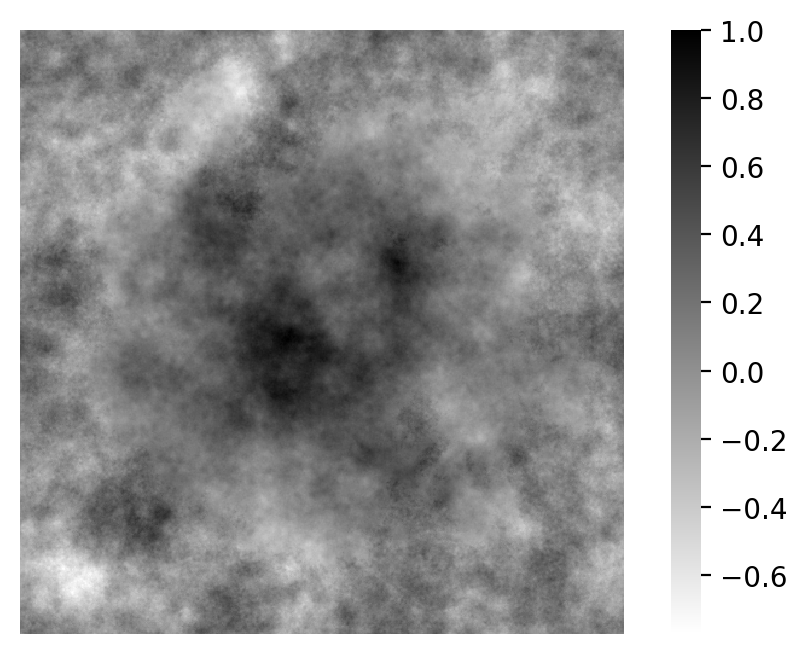

In [41]:
resolution = 500
islandBordersNoise = simplex(resolution=resolution,octaves=4,persistence=2,lacunarity=0.2,seed=seed)
islandBordersMainCircle = (heat(resolution,temperature=19,x=resolution/2,y=resolution/2)*2)+1


islandBordersNoiseF = MCode.clearAt(islandBordersNoise,-1)
islandBordersMainCircleF = MCode.clearAt(islandBordersMainCircle,-1)

islandBorder = MCode.joinOnMax( islandBordersNoiseF,islandBordersMainCircleF) + simplex(resolution=resolution,octaves=5,persistence=2,lacunarity=0.3,seed=seed+500)
islandBorder = MCode.normalize(islandBorder)

Heatmap(islandBordersNoiseF, scale = 2.0,cmap="gray_r",cbar=True)
Heatmap(islandBordersMainCircleF, scale = 2.0,cmap="gray_r",cbar=True)
Heatmap(islandBorder,scale = 2.0,cmap="gray_r",cbar=True)

interactive(children=(IntSlider(value=50, description='w1', step=5), IntSlider(value=50, description='w2', ste…

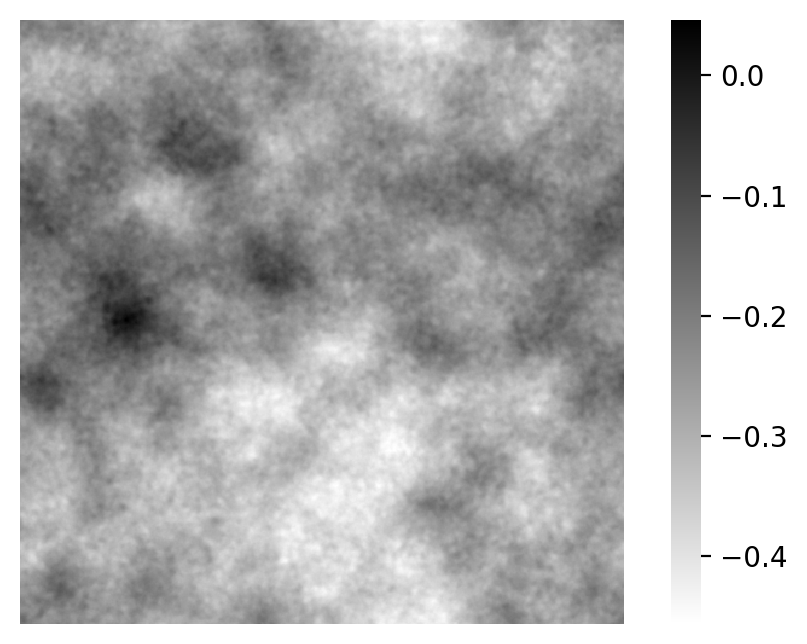

In [42]:
terainNoises = CombineNoises(
    [1.0,0.4,0.1],
    [
        simplex(500,8,2,0.35,seed = seed),
        simplex(500,8,2,0.5,seed=seed+100),
        simplex(500,8,2,0.7,seed=seed+200),
    ]
)

def __helperFunc(seed,w1,w2,w3):
    return CombineNoises(
        [w1/100,w2/100,w3/100],
    [
        simplex(500,8,2,0.35,seed=seed),
        simplex(500,8,2,0.5,seed=seed+100),
        simplex(500,8,2,0.7,seed=seed+200),
    ])

Noise(__helperFunc,w1=(0,100,5),w2=(0,100,5),w3=(0,100,5),seed=(0,1000,10),cbar=True,cmap="gray_r")
Heatmap(terainNoises,scale = 2.0,cmap="gray_r",cbar=True)

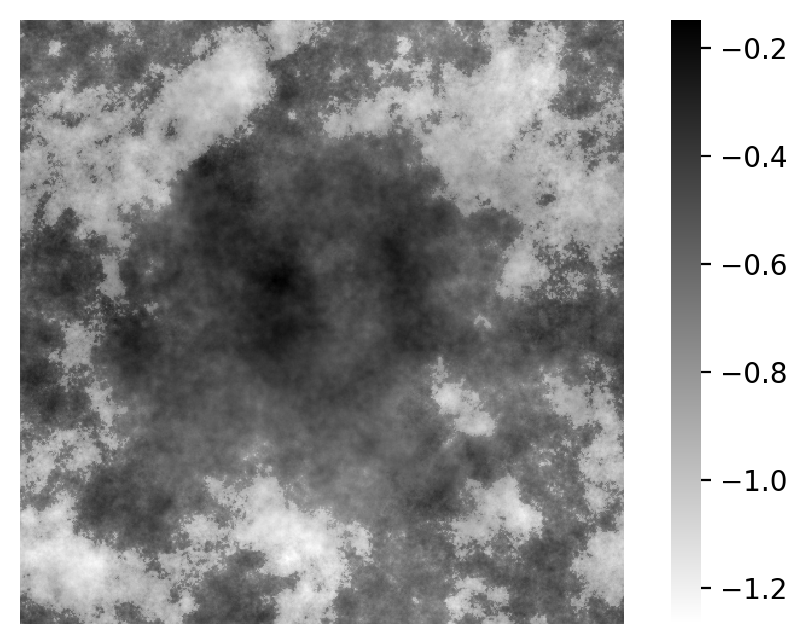

In [43]:
#Compress

terainHightMap = terainNoises -1  + np.sign(islandBorder)*(np.abs(islandBorder)**0.5)/2.0 + 0.5

# -1:1 -> (-2:0 + -1:1)/2 -> -1.5:0.5 + 0.5

Heatmap(terainHightMap,scale = 2.0,cmap="gray_r",cbar=True)

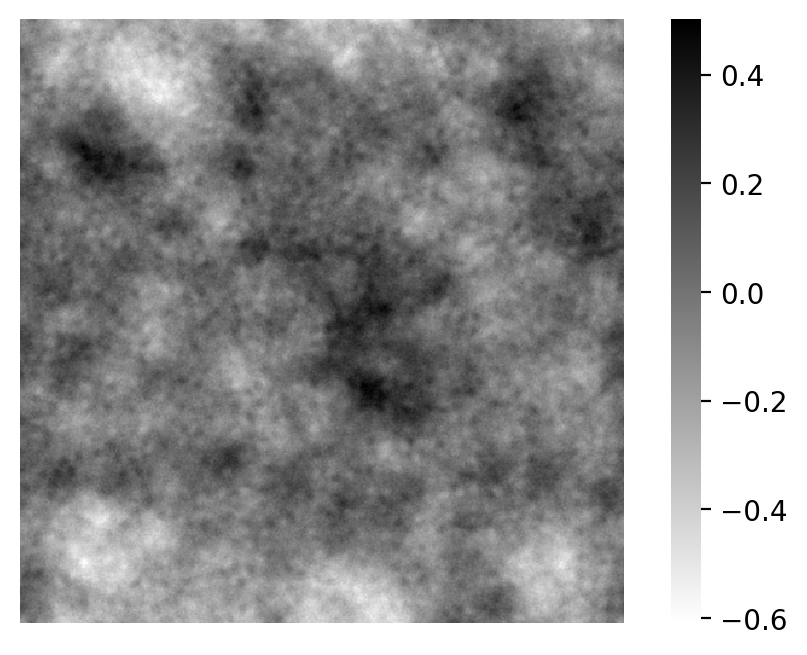

In [44]:
#moisture

terainMoisture = simplex(resolution=resolution,octaves=5,persistence=2,lacunarity=0.27,seed=seed+300)
Heatmap(terainMoisture,scale = 2.0,cmap="gray_r",cbar=True)

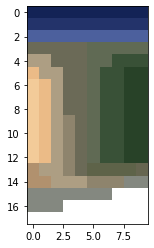

In [45]:
#Add bioms

WATER_DARK = np.array([19,35,86])
WATER_MEDIUM = np.array([35,51,106])
WATER_BRIGHT = np.array([76,96,157])

NATURE_DRY = np.array([107,106,87])
NATURE_SMALL = np.array([96,106,84])
NATURE_NORMAL = np.array([57,81,55])
NATURE_BIG = np.array([40,66,40])


STONES_NATURE_LITTLE = np.array([142,132,109])
STONES_NATURE = np.array([94,99,73])
STONES_NATURE_BIG = np.array([102,101,80])

STONES = np.array([173,158,131])
STONES_DESERT = np.array([177,145,110])

DESERT_LITTLE = np.array([173,158,131])
DESERT_MIDDLE = np.array([235,187,135])
DESSERT = np.array([243,203,153])

SNOW_LOW =  np.array([132,136,128])
SNOW =  np.array([255,255,255])


#Y height, step 5 (16 elems)
#X moisture, step 10 (10 elems)
mapBioms = [
    [WATER_DARK for _ in range(10)],
    [WATER_MEDIUM for _ in range(10)],
    [WATER_BRIGHT for _ in range(10)],
    [NATURE_DRY,NATURE_DRY,NATURE_DRY,NATURE_DRY,NATURE_DRY,NATURE_SMALL,NATURE_SMALL,NATURE_SMALL,NATURE_SMALL,NATURE_SMALL],
    [DESERT_LITTLE,DESERT_LITTLE,NATURE_DRY,NATURE_DRY,NATURE_DRY,NATURE_SMALL,NATURE_SMALL,NATURE_NORMAL,NATURE_NORMAL,NATURE_NORMAL],
    [DESERT_MIDDLE,DESERT_LITTLE,DESERT_LITTLE,NATURE_DRY,NATURE_DRY,NATURE_SMALL,NATURE_NORMAL,NATURE_NORMAL,NATURE_BIG,NATURE_BIG],
    [DESSERT,DESERT_MIDDLE,DESERT_LITTLE,NATURE_DRY,NATURE_DRY,NATURE_SMALL,NATURE_NORMAL,NATURE_NORMAL,NATURE_BIG,NATURE_BIG],
    [DESSERT,DESERT_MIDDLE,DESERT_LITTLE,NATURE_DRY,NATURE_DRY,NATURE_SMALL,NATURE_NORMAL,NATURE_NORMAL,NATURE_BIG,NATURE_BIG],
    [DESSERT,DESERT_MIDDLE,DESERT_LITTLE,NATURE_DRY,NATURE_DRY,NATURE_SMALL,NATURE_NORMAL,NATURE_NORMAL,NATURE_BIG,NATURE_BIG],
    [DESSERT,DESERT_MIDDLE,DESERT_LITTLE,STONES_NATURE_LITTLE,NATURE_DRY,NATURE_SMALL,NATURE_NORMAL,NATURE_NORMAL,NATURE_BIG,NATURE_BIG],
    [DESSERT,DESERT_MIDDLE,DESERT_LITTLE,STONES_NATURE_LITTLE,NATURE_DRY,NATURE_SMALL,NATURE_NORMAL,NATURE_NORMAL,NATURE_BIG,NATURE_BIG],
    [DESSERT,DESERT_MIDDLE,DESERT_LITTLE,STONES_NATURE_LITTLE,NATURE_DRY,NATURE_SMALL,NATURE_NORMAL,NATURE_NORMAL,NATURE_BIG,NATURE_BIG],
    [DESSERT,DESERT_MIDDLE,DESERT_LITTLE,STONES_NATURE_LITTLE,NATURE_DRY,NATURE_SMALL,NATURE_NORMAL,NATURE_NORMAL,NATURE_BIG,NATURE_BIG],
    [STONES_DESERT,STONES,DESERT_LITTLE,STONES_NATURE_LITTLE,NATURE_DRY,STONES_NATURE,STONES_NATURE,STONES_NATURE,STONES_NATURE,STONES_NATURE_BIG],
    [STONES_DESERT,STONES_DESERT,STONES,STONES,STONES,STONES_NATURE_LITTLE,STONES_NATURE_LITTLE,STONES_NATURE_LITTLE,SNOW_LOW,SNOW_LOW],
    [SNOW_LOW,SNOW_LOW,SNOW_LOW,SNOW_LOW,SNOW_LOW,SNOW_LOW,SNOW_LOW,SNOW,SNOW,SNOW],
    [SNOW_LOW,SNOW_LOW,SNOW_LOW,SNOW,SNOW,SNOW,SNOW,SNOW,SNOW,SNOW],
    [SNOW,SNOW,SNOW,SNOW,SNOW,SNOW,SNOW,SNOW,SNOW,SNOW],
]

mapBiomsLevels = len(mapBioms)
mapBiomsDepth = len(mapBioms[0])

colorsLegend = np.zeros(shape=(mapBiomsLevels,mapBiomsDepth,3),dtype=np.ubyte)
for y in range(mapBiomsLevels):
    for x in range(mapBiomsDepth):
        colorsLegend[y][x] = mapBioms[y][x]
plt.imshow(colorsLegend)

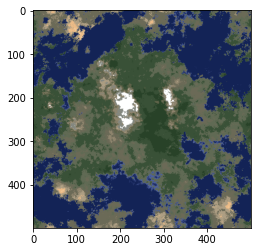

In [52]:
heightMin = -0.8
heightStep = 0.05
heightMax = np.max(terainHightMap)

moistureMin = -0.6
moisureStep = 0.1

map = np.zeros(shape=(resolution,resolution,3),dtype=np.ubyte)
for y in range(resolution):
    for x in range(resolution):
        height = max(terainHightMap[y][x],heightMin)
        moisture = max(terainMoisture[y][x],moistureMin)

        level = int((height - heightMin)/(heightMax + abs(heightMin))/heightStep)
        if level >= mapBiomsLevels:
            level = mapBiomsLevels -1
        depth =  int((moisture - moistureMin)/moisureStep)
        if depth >= mapBiomsDepth:
            depth = mapBiomsDepth-1
        map[y][x] = mapBioms[level][depth]
        

plt.imshow(map)